In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from toolbox import load_mnist, cnn_mnist

2024-09-25 11:20:00.941938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 11:20:01.930810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __1. Import data:__ 

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_mnist(net="cnn")

x-train:(48000, 28, 28, 1), x-val:(12000, 28, 28, 1), x-test:(10000, 28, 28, 1)
y-train:(48000, 10), y-val:(12000, 10), y-test:(10000, 10)


### __2. Import model:__

In [3]:
# load model's architecture:
model = cnn_mnist()

# load model's inner parameters:
model.load_weights("weights/cnn_mnist.weights.h5")

model.summary()

2024-09-25 11:20:04.036245: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       640,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        20,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 679,776 (2.59 MB)

 Trainable params: 679,776 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

### __3. Visualizing CNN__:
#### __3.1 Visualizing filters:__

In [4]:
for layer in model.layers:
    print(layer.name)

input_layer
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dense_1
dense_2


In [5]:
conv = "conv2d"

for layer in model.layers:
    if layer.name == conv:
        break

layer.weights

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=conv2d/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=conv2d/bias>]

In [6]:
filters, biases = layer.weights

filters = filters.numpy()
filters.shape

(3, 3, 1, 32)

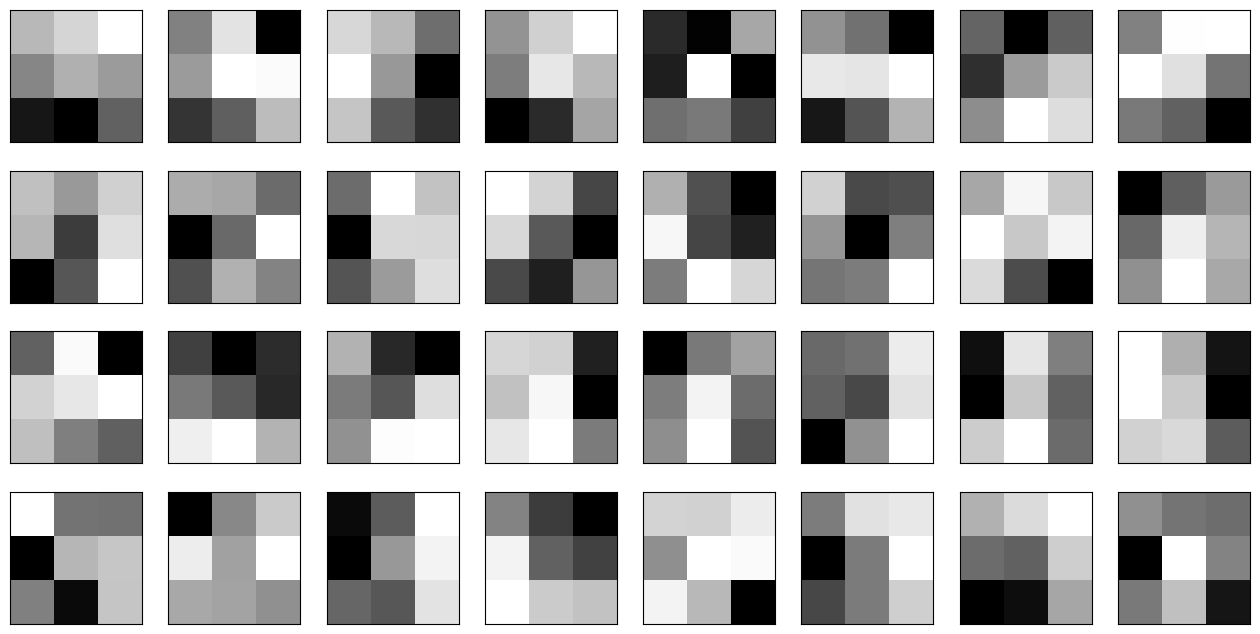

In [7]:
Ni, Nj = 4, 8
n = 0

fig, ax = plt.subplots(Ni, Nj, figsize=(16,8))

for i in range(Ni):
    for j in range(Nj):
        
        filter = filters.T[n][0]
        
        ax[i,j].imshow(filter, cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        n += 1

plt.show()

#### __3.1 Visualizing channel outputs:__

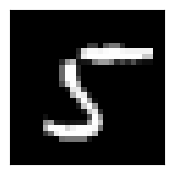

In [8]:
i = 4

img = np.expand_dims(x_train[i], axis=0)

plt.figure(figsize=(3,2))
plt.imshow(img[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
layer_outputs = [layer.output for layer in model.layers[:5]]

layer_outputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor>,
 <KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 13, 13, 32), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 11, 11, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 5, 5, 64), dtype=float32, sparse=False, name=keras_tensor_4>]

In [10]:
out_convs = keras.Model(inputs=model.input, outputs=layer_outputs)

out_convs.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
outputs = out_convs.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [12]:
for out in outputs:
    print(out.shape)
    

(1, 28, 28, 1)
(1, 26, 26, 32)
(1, 13, 13, 32)
(1, 11, 11, 64)
(1, 5, 5, 64)


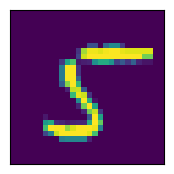

In [13]:
plt.figure(figsize=(3,2))
plt.imshow(outputs[0][0])
plt.xticks([])
plt.yticks([])
plt.show()

Activation: (1, 26, 26, 32)


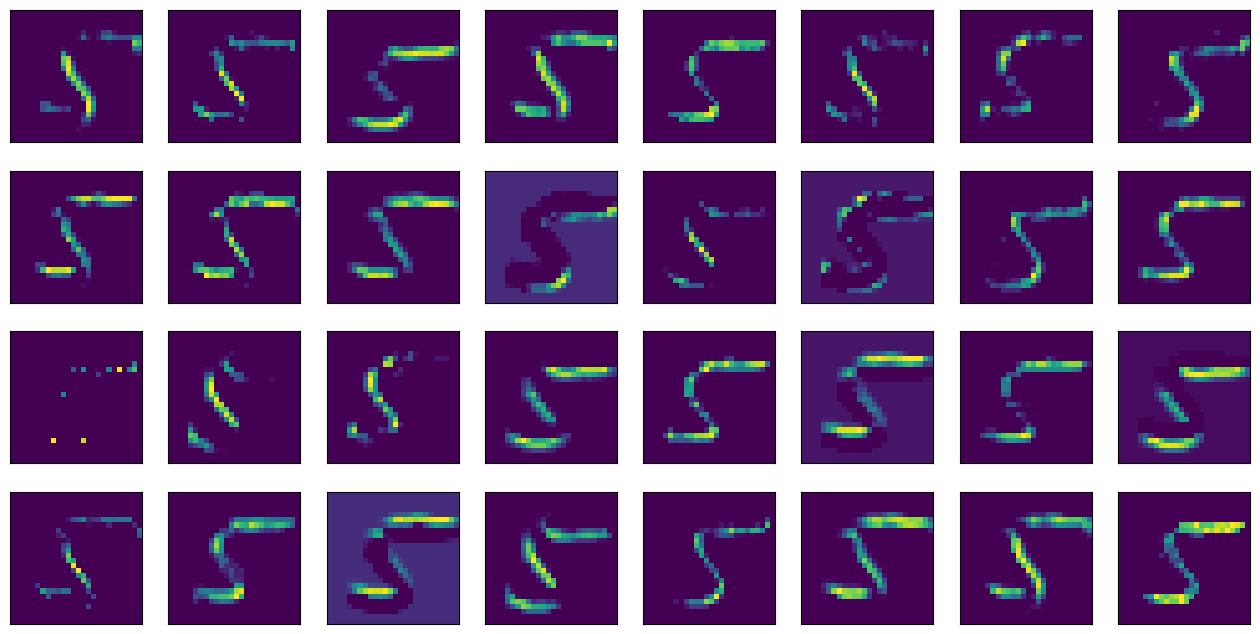

In [14]:
Ni, Nj = 4, 8
l = 1
n = 0

print("Activation:", outputs[l].shape)

fig, ax = plt.subplots(Ni, Nj, figsize=(16,8))

for i in range(Ni):
    for j in range(Nj):
        
        act = outputs[l].T[n].T[0]
        
        ax[i,j].imshow(act)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        n += 1

plt.show()

Activation: (1, 13, 13, 32)


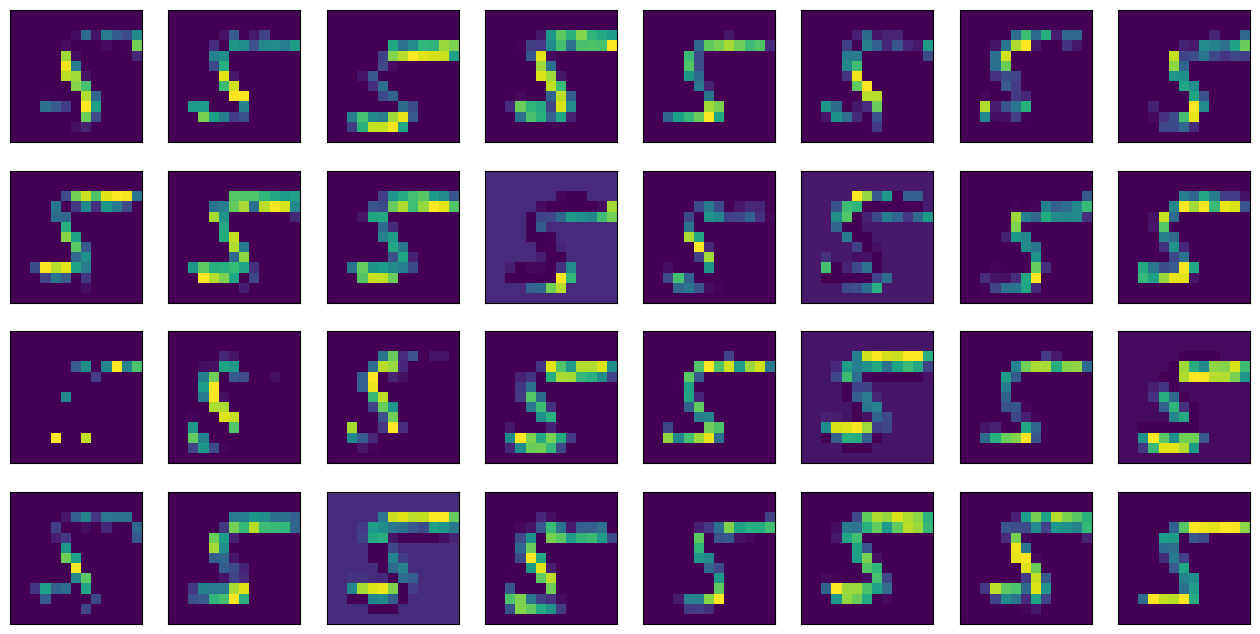

In [15]:
Ni, Nj = 4, 8
l = 2
n = 0

print("Activation:", outputs[l].shape)

fig, ax = plt.subplots(Ni, Nj, figsize=(16,8))

for i in range(Ni):
    for j in range(Nj):
        
        act = outputs[l].T[n].T[0]
        
        ax[i,j].imshow(act)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        n += 1

plt.show()

Activation: (1, 11, 11, 64)


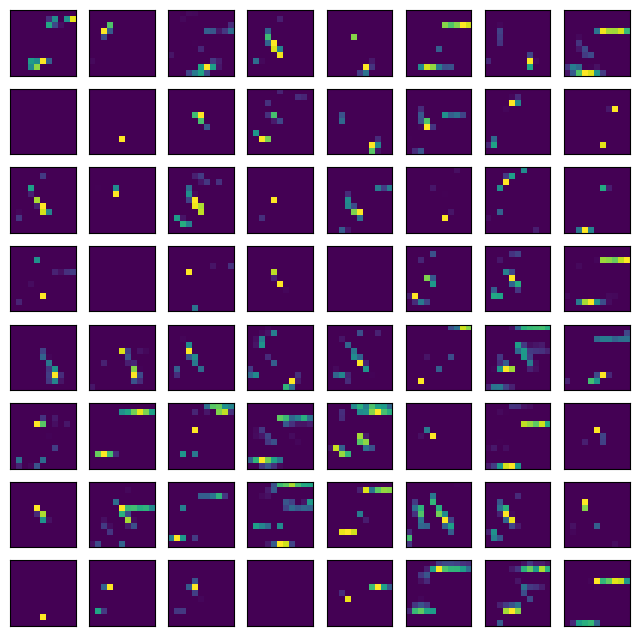

In [16]:
Ni, Nj = 8, 8
l = 3
n = 0

print("Activation:", outputs[l].shape)

fig, ax = plt.subplots(Ni, Nj, figsize=(8,8))

for i in range(Ni):
    for j in range(Nj):
        
        act = outputs[l].T[n].T[0]
        
        ax[i,j].imshow(act)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        n += 1

plt.show()

Activation: (1, 5, 5, 64)


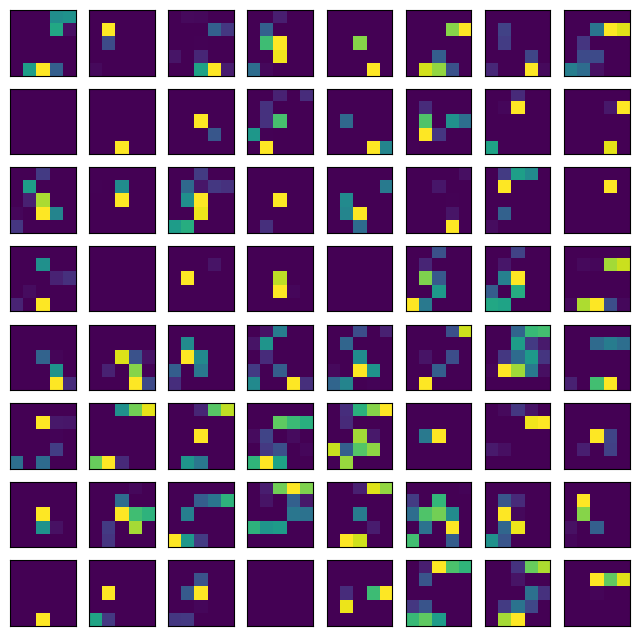

In [17]:
Ni, Nj = 8, 8
l = 4
n = 0

print("Activation:", outputs[l].shape)

fig, ax = plt.subplots(Ni, Nj, figsize=(8,8))

for i in range(Ni):
    for j in range(Nj):
        
        act = outputs[l].T[n].T[0]
        
        ax[i,j].imshow(act)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        n += 1

plt.show()

### __Reference:__
[Deep Learning with Python](https://books.google.com.br/books/about/Deep_Learning_with_Python.html?id=Yo3CAQAACAAJ&redir_esc=y): _Chapter 5, page 160._